# GRIP-The-spark-foundation
my internship tasks for GRIP at The spark foundation was
Exploratory Data Analysis - Retail

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?



Author : <b>Kumar Saurav</b>

Exploratory Data Analysis - Retail

GRIP-The Sparks Foundation
Batch : February 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from plotnine import *

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#All categories
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
# drop Postal Code
data.drop(['Postal Code'],axis = 1,inplace = True)

In [7]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.rename(columns={'Sub-Category':'Sub_Category'},inplace = True)

In [9]:
data.duplicated().sum()

51

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.Sub_Category.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

data.groupby(['Category','Sub_Category']).size().reset_index().rename(columns={0:'count'}).sort_values(ascending=False, by='count')

In [27]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [34]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
count,9944,9944,9944,9944,9944,9944,9944,9944,9944.000000,9944.000000,9944.000000,9944.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5930,5160,9944,906,1980,3177,5986,1518,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.752150,3.794047,0.156440,28.770873
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.644765,2.228752,0.206584,234.841370
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.340000,2.000000,0.000000,1.724800
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,3.000000,0.200000,8.679950
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.104000,5.000000,0.200000,29.534700


data[['Category','Sub_Category','Quantity']].reset_index(drop=True)

In [15]:
#All Quantity sold
SC_Sale = data.groupby(["Category","Sub_Category"]).Sales.sum().reset_index()
SC_Quantity = data.groupby(["Category","Sub_Category"]).Quantity.sum().reset_index()
SC_Profit = data.groupby(["Category","Sub_Category"]).Profit.sum().reset_index()

In [83]:
SC_Sale_Q = pd.merge(SC_Sale,SC_Quantity).sort_values(by='Quantity',ascending=False)
SC_Sale_Q[:5]

,Category,Sub_Category,Sales,Quantity
6,Office Supplies,Binders,203328.859,5961
10,Office Supplies,Paper,77960.894,5100
2,Furniture,Furnishings,91658.444,3555
16,Technology,Phones,329704.678,3286
11,Office Supplies,Storage,223808.440,3156


In [85]:
#
SC_S_Q_P = pd.merge(SC_Sale_Q,SC_Profit).sort_values(by='Profit',ascending=False)
SC_S_Q_P[:5]

,Category,Sub_Category,Sales,Quantity,Profit
16,Technology,Copiers,149528.030,234,55617.8249
3,Technology,Phones,329704.678,3286,44493.0524
6,Technology,Accessories,167303.302,2972,41920.9052
1,Office Supplies,Paper,77960.894,5100,33830.0381
0,Office Supplies,Binders,203328.859,5961,30205.2603


<AxesSubplot:xlabel='Profit'>

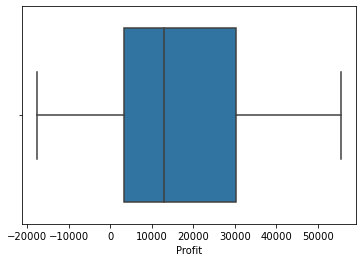

In [48]:
#checking outliers in profit
sb.boxplot(x=SC_S_Q_P['Profit'])

In [18]:
#Average Discount of each product
SC_D = data.groupby(["Category","Sub_Category"]).Discount.mean().reset_index()
SC_D

,Category,Sub_Category,Discount
0,Furniture,Bookcases,0.211460
1,Furniture,Chairs,0.170244
2,Furniture,Furnishings,0.138784
3,Furniture,Tables,0.261285
4,Office Supplies,Appliances,0.166524
5,Office Supplies,Art,0.075158
6,Office Supplies,Binders,0.372069
7,Office Supplies,Envelopes,0.080315
8,Office Supplies,Fasteners,0.082028
9,Office Supplies,Labels,0.069081


In [88]:
SC_S_Q_P_D = pd.merge(SC_S_Q_P,SC_D).sort_values(by='Profit',ascending=False)
SC_S_Q_P_D.head()

,Category,Sub_Category,Sales,Quantity,Profit,Discount
0,Technology,Copiers,149528.030,234,55617.8249,0.161765
1,Technology,Phones,329704.678,3286,44493.0524,0.154505
2,Technology,Accessories,167303.302,2972,41920.9052,0.078396
3,Office Supplies,Paper,77960.894,5100,33830.0381,0.075000
4,Office Supplies,Binders,203328.859,5961,30205.2603,0.372069


In [20]:
#Quanity sold acc to ShipMode and Segment
S_S_C_SC = data.groupby(['Ship Mode','Segment',"Category","Sub_Category"]).Sales.sum().reset_index()
S_S_C_SC

,Ship Mode,Segment,Category,Sub_Category,Sales
0,First Class,Consumer,Furniture,Bookcases,8980.586
1,First Class,Consumer,Furniture,Chairs,23810.191
2,First Class,Consumer,Furniture,Furnishings,7896.788
3,First Class,Consumer,Furniture,Tables,9191.455
4,First Class,Consumer,Office Supplies,Appliances,9769.952
...,...,...,...,...,...
199,Standard Class,Home Office,Office Supplies,Supplies,1027.674
200,Standard Class,Home Office,Technology,Accessories,18054.750
201,Standard Class,Home Office,Technology,Copiers,14539.756
202,Standard Class,Home Office,Technology,Machines,38691.221


In [72]:
#First Class
First_Class = S_S_C_SC[S_S_C_SC['Ship Mode']=='First Class'].drop(['Ship Mode'],axis = 1)


In [22]:
from plotnine import *
import warnings

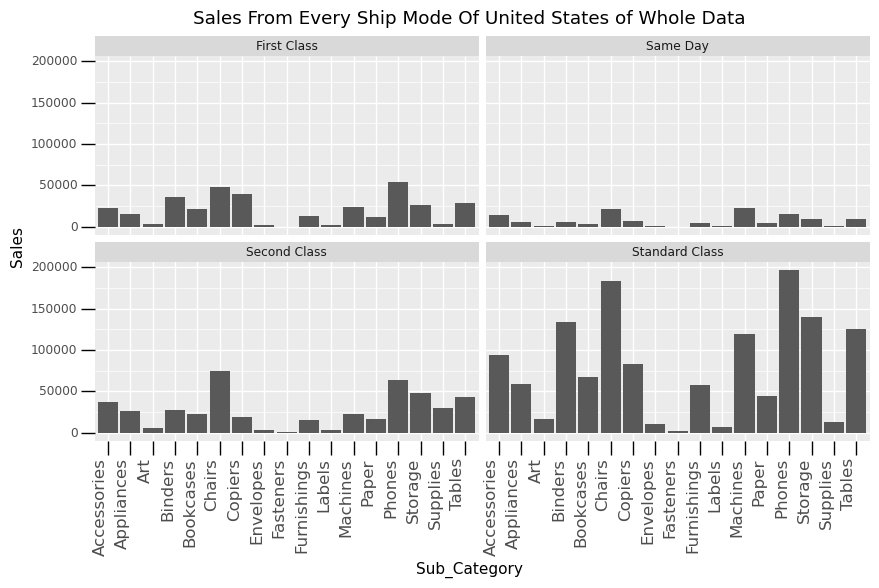

<ggplot: (163257741879)>

In [23]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(data, aes(x='Sub_Category', y='Sales')) + geom_bar(stat = "identity") + facet_wrap(['Ship Mode']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Ship Mode Of United States of Whole Data"))

In [51]:
#Checking Correlation Between Values
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


Finding from above:
1. Sales is Directly Proportional to Quantity and Profit.
2. Discount is Inversly Proportional to Sale and Profit.
3. Quantity does not affect Discount and Profit

In [52]:
data.cov()

,Sales,Quantity,Discount,Profit
Sales,390181.082925,279.088165,-3.693757,70277.064208
Quantity,279.088165,4.967335,0.003825,34.591355
Discount,-3.693757,0.003825,0.042677,-10.670204
Profit,70277.064208,34.591355,-10.670204,55150.469191


Finding from above:
1. Sales and Profit increases as Discount Decrease.

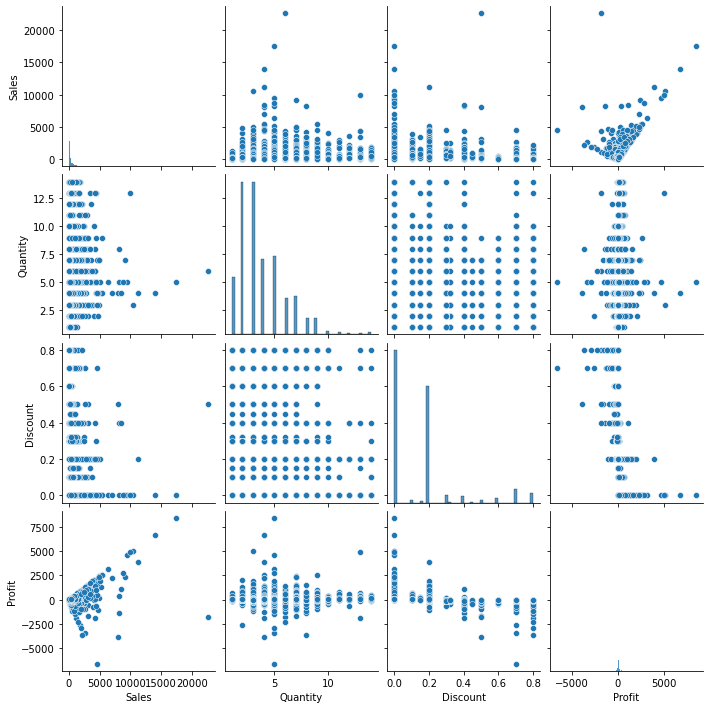

In [56]:
sb.pairplot(data)

Above Plots verify the basic relation between Profit, Sale and Discount.

# Finding Most sold Product

<AxesSubplot:xlabel='Sub_Category', ylabel='Quantity'>

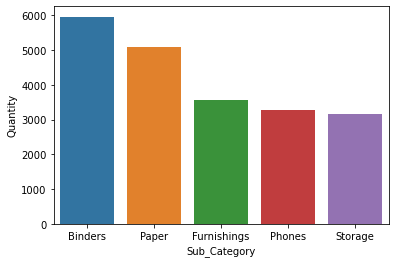

In [71]:

sb.barplot(x = 'Sub_Category', y = 'Quantity', data = SC_Sale_Q[:5])

# Least Sold Product

<AxesSubplot:xlabel='Sub_Category', ylabel='Quantity'>

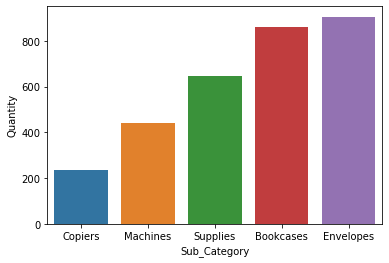

In [110]:

sb.barplot(x = 'Sub_Category', y = 'Quantity', data = SC_Sale_Q.sort_values(by='Quantity',ascending=True)[:5])

# Most Profitable Product


<AxesSubplot:xlabel='Sub_Category', ylabel='Profit'>

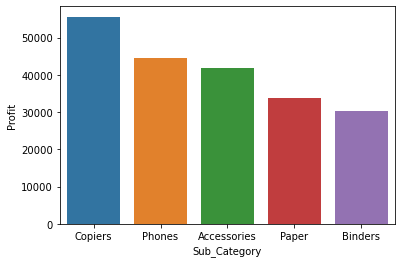

In [89]:
sb.barplot(x = 'Sub_Category', y = 'Profit', data = SC_S_Q_P_D[:5])

# Least Profitable Product

<AxesSubplot:xlabel='Sub_Category', ylabel='Profit'>

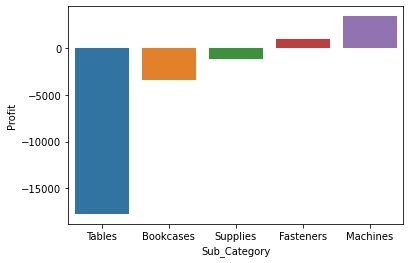

In [116]:

sb.barplot(x = 'Sub_Category', y = 'Profit', data = SC_S_Q_P_D.sort_values(by='Profit',ascending=True)[:5])

# Most Discounted Product 

<AxesSubplot:xlabel='Sub_Category', ylabel='Discount'>

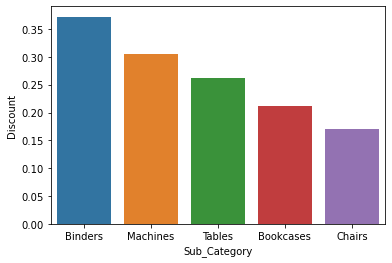

In [120]:
sb.barplot(x = 'Sub_Category', y = 'Discount', data = SC_S_Q_P_D.sort_values(by='Discount',ascending=False)[:5])

# Least Discounted Product 

<AxesSubplot:xlabel='Sub_Category', ylabel='Discount'>

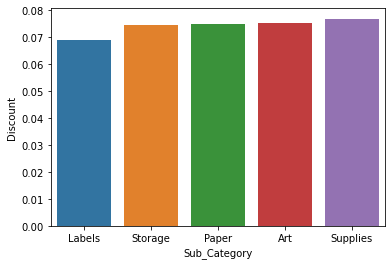

In [121]:
sb.barplot(x = 'Sub_Category', y = 'Discount', data = SC_S_Q_P_D.sort_values(by='Discount',ascending=True)[:5])

# Conclusion
I was able to successfully carry-out EDA on Retail-db data set task and was able to extract important insights from the data .
Thank You.